GRUPO GANADOR- PARTIDO 3

PRIMER INFORME

In [1]:
from itertools import count
from statistics import geometric_mean
import pandas as pd
import numpy as np

Abrimos las bases de datos "resultados_paso" y "circuitos_electorales"(una base descargada del GCBA que usaremos para vincular circuitos electorales con comunas)

In [2]:
resultados_paso = pd.read_csv(
    "paso_x_partido.csv" "",
    delimiter=",",  # delimitador ',',';','|','\t'
    header=0,  # número de fila como nombre de columna
    names=None,  # nombre de las columnas (ojo con header)
    index_col=0,  # que col es el índice
    usecols=None,  # que col usar. Ej: [0, 1, 2], ['foo', 'bar', 'baz']
    dtype=None,  # Tipo de col {'a': np.int32, 'b': str}
    skiprows=None,  # saltear filas al inicio
    skipfooter=0,  # saltear filas al final
    nrows=None,  # n de filas a leer
    decimal=".",  # separador de decimal. Ej: ',' para EU dat
    quotechar='"',  # char para reconocer str
    encoding=None,
)

resultados_paso  # archivos con tilde y ñ por lo general utilizan "utf-8" etc
#%%
comunas = pd.read_csv(
    "circuitos-electorales.csv",
    delimiter=",",  # delimitador ',',';','|','\t'
    header=0,  # número de fila como nombre de columna
    names=None,  # nombre de las columnas (ojo con header)
    index_col=0,  # que col es el índice
    usecols=None,  # que col usar. Ej: [0, 1, 2], ['foo', 'bar', 'baz']
    dtype=None,  # Tipo de col {'a': np.int32, 'b': str}
    skiprows=None,  # saltear filas al inicio
    skipfooter=0,  # saltear filas al final
    nrows=None,  # n de filas a leer
    decimal=".",  # separador de decimal. Ej: ',' para EU dat
    quotechar='"',  # char para reconocer str
    encoding=None,
)

vinculamos circuitos electorales con comunas

In [3]:
circuito_comuna = comunas[["COMUNA", "CIRCUITO_N", "BARRIO"]].rename(
    columns={"CIRCUITO_N": "circuito"}
)
circuito_comuna = circuito_comuna.sort_values(by=["circuito"])
circuito_comuna = circuito_comuna.reset_index(drop=True)

tabla_final = pd.merge(
    resultados_paso, circuito_comuna, on="circuito", how="outer", indicator=True
)
tabla_final

,circuito,urna,pp1,pp2,pp3,pp4,nv,COMUNA,BARRIO,_merge
0,1,0,64,74,49,50,63,1,SAN TELMO,both
1,1,1,79,81,44,36,60,1,SAN TELMO,both
2,1,2,72,74,55,34,65,1,SAN TELMO,both
3,1,3,82,80,37,38,63,1,SAN TELMO,both
4,1,4,64,87,57,28,64,1,SAN TELMO,both
...,...,...,...,...,...,...,...,...,...,...
7634,167,32,76,46,56,66,56,15,AGRONOMIA,both
7635,167,33,62,59,51,57,71,15,AGRONOMIA,both
7636,167,34,63,52,51,69,65,15,AGRONOMIA,both
7637,167,35,68,66,51,64,51,15,AGRONOMIA,both


DISTRIBUCION DE LOS VOTOS DE CADA CANDIDATO POR COMUNA

In [90]:
distrib_candidatos = (
    tabla_final[["COMUNA", "pp1", "pp2", "pp3", "pp4", "nv", "BARRIO",]]
    .groupby(["COMUNA"])
    .sum()
    .transform(lambda x: (x + 0.0) / x.sum() * 100)
)
distrib_candidatos


,pp1,pp2,pp3,pp4,nv
COMUNA,,,,,
1,7.232794,9.450333,5.152216,4.998396,6.698759
2,4.439748,4.805121,7.125770,6.884241,5.815161
3,7.573100,7.902294,5.214219,5.623694,6.537122
4,8.411547,9.968829,4.995669,5.114962,7.105827
5,6.772836,6.259406,6.069294,6.360912,6.419809
6,5.903311,4.896027,7.384997,7.114055,6.272286
7,7.524485,8.139089,7.119394,6.815452,7.480038
8,6.617667,9.496991,3.263092,3.665963,5.781864
9,6.131736,5.339826,5.227412,5.180434,5.415370


TOTAL DE VOTOS DE CADA CANDIDATO X COMUNA

In [92]:
total_votos_x_comunas = (
    tabla_final[["COMUNA","circuito", "pp1", "pp2", "pp3", "pp4", "nv", "BARRIO"]]
    .groupby(["COMUNA","circuito"])
    .sum()
)
total_votos_x_comunas

pp1   pp2   pp3   pp4    nv
COMUNA circuito                              
1      1         1955  2113  1237  1182  1655
       2         2005  2122  1220  1390  1618
       3          600   812   286   383   509
       4          336   371   140   196   240
       5         4053  4071  3029  2929  3443
...               ...   ...   ...   ...   ...
15     163       2290  2276  2040  2174  2174
       164       2095  1900  2039  2106  2119
       165       3618  3588  3157  3399  3501
       166       2970  2569  2773  2878  2798
       167       2358  2033  2091  2317  2250

[167 rows x 5 columns]

creamos una columna para ver la candiad de votantes de cada comuna

In [93]:
total_votos_x_comunas = total_votos_x_comunas.assign(
    total_x_comuna=lambda x: (x["pp1"] + x["pp2"] + x["pp3"] + x["pp4"] + x["nv"])
)
total_votos_x_comunas

pp1   pp2   pp3   pp4    nv  total_x_comuna
COMUNA circuito                                              
1      1         1955  2113  1237  1182  1655            8142
       2         2005  2122  1220  1390  1618            8355
       3          600   812   286   383   509            2590
       4          336   371   140   196   240            1283
       5         4053  4071  3029  2929  3443           17525
...               ...   ...   ...   ...   ...             ...
15     163       2290  2276  2040  2174  2174           10954
       164       2095  1900  2039  2106  2119           10259
       165       3618  3588  3157  3399  3501           17263
       166       2970  2569  2773  2878  2798           13988
       167       2358  2033  2091  2317  2250           11049

[167 rows x 6 columns]

Ahora calculamos que porcentaje de votos obtuvo cada candidato en cada comuna

In [94]:
porcentaje_votos_x_comunas = total_votos_x_comunas.transform(
    (lambda x: (x + 0.0) / x["total_x_comuna"] * 100), axis=1
)
porcentaje_votos_x_comunas

pp1        pp2        pp3        pp4         nv  \
COMUNA circuito                                                          
1      1         24.011299  25.951855  15.192827  14.517318  20.326701   
       2         23.997606  25.397965  14.602035  16.636744  19.365649   
       3         23.166023  31.351351  11.042471  14.787645  19.652510   
       4         26.188620  28.916602  10.911925  15.276695  18.706157   
       5         23.126961  23.229672  17.283880  16.713267  19.646220   
...                    ...        ...        ...        ...        ...   
15     163       20.905605  20.777798  18.623334  19.846631  19.846631   
       164       20.421094  18.520324  19.875232  20.528317  20.655035   
       165       20.958119  20.784336  18.287667  19.689509  20.280368   
       166       21.232485  18.365742  19.824135  20.574778  20.002860   
       167       21.341298  18.399855  18.924790  20.970224  20.363834   

                 total_x_comuna  
COMUNA circuito                  
1      1                  100.0  
       2                  100.0  
       3                  100.0  
       4                  100.0  
       5                  100.0  
...                         ...  
15     163                100.0  
       164                100.0  
       165                100.0  
       166                100.0  
       167                100.0  

[167 rows x 6 columns]

In [100]:
porcentaje_votos_x_comunas.reset_index(inplace=True)

In [101]:
porcentaje_votos_x_comunas


,COMUNA,circuito,pp1,pp2,pp3,pp4,nv,total_x_comuna
0,1,1,24.011299,25.951855,15.192827,14.517318,20.326701,100.0
1,1,2,23.997606,25.397965,14.602035,16.636744,19.365649,100.0
2,1,3,23.166023,31.351351,11.042471,14.787645,19.652510,100.0
3,1,4,26.188620,28.916602,10.911925,15.276695,18.706157,100.0
4,1,5,23.126961,23.229672,17.283880,16.713267,19.646220,100.0
...,...,...,...,...,...,...,...,...
162,15,163,20.905605,20.777798,18.623334,19.846631,19.846631,100.0
163,15,164,20.421094,18.520324,19.875232,20.528317,20.655035,100.0
164,15,165,20.958119,20.784336,18.287667,19.689509,20.280368,100.0
165,15,166,21.232485,18.365742,19.824135,20.574778,20.002860,100.0


Ordenamos las comunas en función del desempeño de nuestro candidato

In [95]:
porcentaje_orden = porcentaje_votos_x_comunas.sort_values(["pp3"], ascending=False)
porcentaje_orden

pp1        pp2        pp3        pp4         nv  \
COMUNA circuito                                                          
2      21        14.911404   9.859155  32.975920  21.899137  20.354384   
13     144       13.819275   9.752255  32.120865  23.857941  20.449663   
2      20        14.582606  14.093608  30.387705  20.817324  20.118757   
13     138       13.913556  10.998035  30.133595  24.632613  20.322200   
14     155       13.342616  12.137507  29.791627  25.000000  19.728250   
...                    ...        ...        ...        ...        ...   
7      76        19.127813  41.719370   8.817473   9.957347  20.377997   
4      44        21.073095  48.367030   4.406428   5.728357  20.425091   
       45        20.645574  50.079898   3.739214   5.512943  20.022371   
1      6         17.301650  54.588898   3.698612   4.660906  19.749935   
4      43        20.918087  53.555067   2.253986   3.481767  19.791094   

                 total_x_comuna  
COMUNA circuito                  
2      21                 100.0  
13     144                100.0  
2      20                 100.0  
13     138                100.0  
14     155                100.0  
...                         ...  
7      76                 100.0  
4      44                 100.0  
       45                 100.0  
1      6                  100.0  
4      43                 100.0  

[167 rows x 6 columns]

Abrimos las bases de datos del censo

In [9]:
hogar = pd.read_csv("censo/hogar.csv", sep=",")

#
vivienda = pd.read_csv("censo/vivienda.csv", sep=",")

#
persona = pd.read_csv("censo/persona.csv", sep=",")

#
prov = pd.read_csv("censo/prov.csv", sep=",")

# 
radio = pd.read_csv("censo/radio.csv")

# 
frac = pd.read_csv("censo/frac.csv")


utilizamos la siguiente linea de codigo para vincular las comunas, con las personas, viviendas y hogares

In [10]:
dpto = pd.read_csv("censo/dpto.csv")
dpto = dpto[["DPTO_REF_ID", "NOMDPTO"]]
#dpto
# %%
dpto_frac = pd.merge(dpto, frac, on="DPTO_REF_ID", how="left")
dpto_frac.groupby = ["NOMDPTO"]
#dpto_frac
# %%
dpto_frac_radio = pd.merge(dpto_frac, radio, on="FRAC_REF_ID", how="right")
#dpto_frac_radio

# %%
dpto_frac_radio_vivienda = pd.merge(
    dpto_frac_radio, vivienda, on="RADIO_REF_ID", how="right", indicator=True
)
dpto_frac_radio_vivienda.rename(columns={"DPTO_REF_ID": "COMUNA"}, inplace=True)
#dpto_frac_radio_vivienda
#%%
# dpto_frac_radio_vivienda[dpto_frac_radio_vivienda.columns[[0,6,7,8,9,10,11,12,13,14,15,16,17]]]
dpto_frac_radio_vivienda = dpto_frac_radio_vivienda[
    dpto_frac_radio_vivienda.columns[[0, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]]
].copy()
# %%
#dpto_frac_radio_vivienda
# %%
hogarSUPREMO = pd.merge(
    dpto_frac_radio_vivienda, hogar, on="VIVIENDA_REF_ID", how="right"
)

en la siguiente variable, se almacena por comuna el cruce de todas las variables de hogares y vivienda

In [11]:
hogarSUPREMO

,COMUNA,VIVIENDA_REF_ID,TIPVV,V01,V02,V00,URP,INCALSERV,INMAT,MUNI,...,H15,H16,H19A,H19B,H19C,H19D,PROP,INDHAC,TOTPERS,ALGUNBI
0,1,1,1,1,1,0,1,1,1,20010001,...,2,2,1,2,1,2,5,1,1,0
1,1,1,1,1,1,0,1,1,1,20010001,...,1,2,1,1,1,1,1,1,1,0
2,1,1,1,1,1,0,1,1,1,20010001,...,3,5,1,1,1,1,1,1,2,0
3,1,1,1,1,1,0,1,1,1,20010001,...,3,5,1,1,1,1,5,6,8,1
4,1,2,1,7,1,0,1,1,2,20010001,...,5,5,1,1,2,1,6,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1152594,15,1426434,1,4,1,0,1,1,1,20150001,...,2,3,1,1,1,1,1,1,1,0
1152595,15,1426435,1,4,1,0,1,1,1,20150001,...,1,2,1,2,2,1,1,1,1,0
1152596,15,1426436,1,4,1,0,1,1,1,20150001,...,2,3,1,1,1,1,1,3,3,0
1152597,15,1426437,2,0,0,9,1,0,0,20150001,...,0,0,0,0,0,0,0,7,0,2


en la siguiente variable, se almacena por comuna el cruce de todas las variables de hogares, viviendas y personas

In [12]:
personaSUPREMO = pd.merge(hogarSUPREMO, persona, on="HOGAR_REF_ID", how="right")
personaSUPREMO

,COMUNA,VIVIENDA_REF_ID,TIPVV,V01,V02,V00,URP,INCALSERV,INMAT,MUNI,...,P05,P06,P07,P12,EDADAGRU,EDADQUI,P08,P09,P10,CONDACT
0,1,1,1,1,1,0,1,1,1,20010001,...,1,0,1,2,2,13,2,4,2,1
1,1,1,1,1,1,0,1,1,1,20010001,...,1,0,1,1,2,10,2,4,1,1
2,1,1,1,1,1,0,1,1,1,20010001,...,1,0,1,1,3,14,2,7,2,1
3,1,1,1,1,1,0,1,1,1,20010001,...,1,0,1,1,2,13,2,6,1,3
4,1,1,1,1,1,0,1,1,1,20010001,...,2,221,1,1,2,5,1,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2890146,15,1426438,2,0,0,1,1,0,0,20150001,...,1,0,1,0,3,20,2,2,1,0
2890147,15,1426438,2,0,0,1,1,0,0,20150001,...,1,0,1,0,3,19,2,6,1,0
2890148,15,1426438,2,0,0,1,1,0,0,20150001,...,1,0,1,0,3,17,2,2,1,0
2890149,15,1426438,2,0,0,1,1,0,0,20150001,...,1,0,1,0,3,18,2,2,1,0


A continuacíon, nos preguntamos sobre cuantas personas del censo son votantes

In [13]:
votantes = personaSUPREMO[personaSUPREMO["P03"] >= 18]
votantes

,COMUNA,VIVIENDA_REF_ID,TIPVV,V01,V02,V00,URP,INCALSERV,INMAT,MUNI,...,P05,P06,P07,P12,EDADAGRU,EDADQUI,P08,P09,P10,CONDACT
0,1,1,1,1,1,0,1,1,1,20010001,...,1,0,1,2,2,13,2,4,2,1
1,1,1,1,1,1,0,1,1,1,20010001,...,1,0,1,1,2,10,2,4,1,1
2,1,1,1,1,1,0,1,1,1,20010001,...,1,0,1,1,3,14,2,7,2,1
3,1,1,1,1,1,0,1,1,1,20010001,...,1,0,1,1,2,13,2,6,1,3
4,1,1,1,1,1,0,1,1,1,20010001,...,2,221,1,1,2,5,1,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2890146,15,1426438,2,0,0,1,1,0,0,20150001,...,1,0,1,0,3,20,2,2,1,0
2890147,15,1426438,2,0,0,1,1,0,0,20150001,...,1,0,1,0,3,19,2,6,1,0
2890148,15,1426438,2,0,0,1,1,0,0,20150001,...,1,0,1,0,3,17,2,2,1,0
2890149,15,1426438,2,0,0,1,1,0,0,20150001,...,1,0,1,0,3,18,2,2,1,0


Procedimiento para el analisis comuna de un primer grupo de variables significativas

tomamos la comuna 1 para graficar este analisis pormenorizado

Filtramos para obtener solo los casos de la comuna 1

In [14]:
is_comuna1 = votantes.loc[:,"COMUNA"] == 1
comuna1 = votantes[is_comuna1]
comuna1

,COMUNA,VIVIENDA_REF_ID,TIPVV,V01,V02,V00,URP,INCALSERV,INMAT,MUNI,...,P05,P06,P07,P12,EDADAGRU,EDADQUI,P08,P09,P10,CONDACT
0,1,1,1,1,1,0,1,1,1,20010001,...,1,0,1,2,2,13,2,4,2,1
1,1,1,1,1,1,0,1,1,1,20010001,...,1,0,1,1,2,10,2,4,1,1
2,1,1,1,1,1,0,1,1,1,20010001,...,1,0,1,1,3,14,2,7,2,1
3,1,1,1,1,1,0,1,1,1,20010001,...,1,0,1,1,2,13,2,6,1,3
4,1,1,1,1,1,0,1,1,1,20010001,...,2,221,1,1,2,5,1,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205881,1,131382,2,0,0,1,1,0,0,20010001,...,1,0,1,0,3,15,2,4,2,0
205882,1,131382,2,0,0,1,1,0,0,20010001,...,1,0,1,0,3,19,2,2,1,0
205883,1,131382,2,0,0,1,1,0,0,20010001,...,1,0,1,0,3,17,2,4,1,0
205884,1,131382,2,0,0,1,1,0,0,20010001,...,1,0,1,0,3,18,2,2,1,0


VARIABLES DE POBLACION

creamos un dataframe que nos muestra las variables de población para la comuna 1

In [15]:
comuna1_poblacion = comuna1[["COMUNA", "P03", "P05", "P07", "P08", "P09", "CONDACT"]].copy()
comuna1_poblacion

,COMUNA,P03,P05,P07,P08,P09,CONDACT
0,1,61,1,1,2,4,1
1,1,48,1,1,2,4,1
2,1,65,1,1,2,7,1
3,1,62,1,1,2,6,3
4,1,20,2,1,1,4,1
...,...,...,...,...,...,...,...
205881,1,72,1,1,2,4,0
205882,1,90,1,1,2,2,0
205883,1,84,1,1,2,4,0
205884,1,87,1,1,2,2,0


Medidas estadisticas por edad en la comuna

In [16]:
edad_c1 = comuna1_poblacion["P03"].describe()
edad_c1

count    168197.000000
mean         44.406523
std          18.825965
min          18.000000
25%          28.000000
50%          41.000000
75%          58.000000
max         110.000000
Name: P03, dtype: float64

moda del ultimo nivel educativo alcanzado

In [17]:
moda_educacion_c1 = comuna1_poblacion["P09"].mode()
moda_educacion_c1

0    4
Name: P09, dtype: int64

Cantidad de casos por ultimo nivel educativo alcanzado

In [18]:
educacion_c1 = comuna1_poblacion.groupby(['P09']).count()
educacion_c1

,COMUNA,P03,P05,P07,P08,CONDACT
P09,,,,,,
0,1709,1709,1709,1709,1709,1709
1,92,92,92,92,92,92
2,28073,28073,28073,28073,28073,28073
3,176,176,176,176,176,176
4,58686,58686,58686,58686,58686,58686
5,554,554,554,554,554,554
6,18169,18169,18169,18169,18169,18169
7,53331,53331,53331,53331,53331,53331
8,7098,7098,7098,7098,7098,7098


porcentaje del ultimo nivel educativo alcanzado

In [19]:
porcentaje_educacion_c1 = educacion_c1.transform(
    (lambda x: (x + 0.0) / 168197 * 100), axis=1
)
porcentaje_educacion_c1

,COMUNA,P03,P05,P07,P08,CONDACT
P09,,,,,,
0,1.016070,1.016070,1.016070,1.016070,1.016070,1.016070
1,0.054698,0.054698,0.054698,0.054698,0.054698,0.054698
2,16.690547,16.690547,16.690547,16.690547,16.690547,16.690547
3,0.104639,0.104639,0.104639,0.104639,0.104639,0.104639
4,34.891229,34.891229,34.891229,34.891229,34.891229,34.891229
5,0.329376,0.329376,0.329376,0.329376,0.329376,0.329376
6,10.802214,10.802214,10.802214,10.802214,10.802214,10.802214
7,31.707462,31.707462,31.707462,31.707462,31.707462,31.707462
8,4.220051,4.220051,4.220051,4.220051,4.220051,4.220051


Medidas estadisticas por ultimo nivel educativo alcanzado

In [20]:
descripcion_educacion_c1 = comuna1_poblacion["P09"].describe()
descripcion_educacion_c1

count    168197.000000
mean          4.971409
std           1.975536
min           0.000000
25%           4.000000
50%           4.000000
75%           7.000000
max           9.000000
Name: P09, dtype: float64

moda de la condiciíon de actividad

In [21]:
moda_poblacion_actividad_c1 = comuna1_poblacion["CONDACT"].mode()
moda_poblacion_actividad_c1

0    1
Name: CONDACT, dtype: int64

cantidad de casos por condiciíon de actividad

In [22]:
poblacion_actividad_c1 = comuna1_poblacion.groupby(['CONDACT']).count()
poblacion_actividad_c1

,COMUNA,P03,P05,P07,P08,P09
CONDACT,,,,,,
0,15274,15274,15274,15274,15274,15274
1,113509,113509,113509,113509,113509,113509
2,5281,5281,5281,5281,5281,5281
3,34133,34133,34133,34133,34133,34133


porcentaje por condiciíon de actividad

In [23]:
porcentaje_actividad_c1 = poblacion_actividad_c1.transform(
    (lambda x: (x + 0.0) / 168197 * 100), axis=1
)
porcentaje_actividad_c1

,COMUNA,P03,P05,P07,P08,P09
CONDACT,,,,,,
0,9.081018,9.081018,9.081018,9.081018,9.081018,9.081018
1,67.485746,67.485746,67.485746,67.485746,67.485746,67.485746
2,3.139771,3.139771,3.139771,3.139771,3.139771,3.139771
3,20.293465,20.293465,20.293465,20.293465,20.293465,20.293465


VARIABLES DE VIVIENDA

creamos un dataframe que nos muestra las variables de vivienda para la comuna 1

In [24]:
comuna1_vivienda = comuna1[["COMUNA", "TIPVV", "V01", "INMAT", "INCALSERV", "INCALCONS"]].copy()
comuna1_vivienda

,COMUNA,TIPVV,V01,INMAT,INCALSERV,INCALCONS
0,1,1,1,1,1,1
1,1,1,1,1,1,1
2,1,1,1,1,1,1
3,1,1,1,1,1,1
4,1,1,1,1,1,1
...,...,...,...,...,...,...
205881,1,2,0,0,0,0
205882,1,2,0,0,0,0
205883,1,2,0,0,0,0
205884,1,2,0,0,0,0


MODA de tipo de tipo de vivienda (particular o colectiva)

In [25]:
vivienda_agrupado_c1 = comuna1_vivienda["TIPVV"].mode()
vivienda_agrupado_c1

0    1
Name: TIPVV, dtype: int64

MODA de tipo de tipo de vivienda (V01)

In [26]:
tipo_vivienda_c1 = comuna1_vivienda["V01"].mode()
tipo_vivienda_c1

0    4
Name: V01, dtype: int64

cantidad por tipo de vivienda

In [27]:
cant_tipo_vivienda_c1 = comuna1_vivienda.groupby(['V01']).count()
cant_tipo_vivienda_c1

,COMUNA,TIPVV,INMAT,INCALSERV,INCALCONS
V01,,,,,
0,15274,15274,15274,15274,15274
1,20917,20917,20917,20917,20917
2,208,208,208,208,208
3,571,571,571,571,571
4,113250,113250,113250,113250,113250
5,8763,8763,8763,8763,8763
6,8362,8362,8362,8362,8362
7,586,586,586,586,586
8,14,14,14,14,14


porcentaje de tipo de vivienda

In [28]:
porcentaje_tipo_vivienda_c1 = cant_tipo_vivienda_c1.transform(
    (lambda x: (x + 0.0) / 168197 * 100), axis=1
)
porcentaje_tipo_vivienda_c1

,COMUNA,TIPVV,INMAT,INCALSERV,INCALCONS
V01,,,,,
0,9.081018,9.081018,9.081018,9.081018,9.081018
1,12.436013,12.436013,12.436013,12.436013,12.436013
2,0.123665,0.123665,0.123665,0.123665,0.123665
3,0.339483,0.339483,0.339483,0.339483,0.339483
4,67.331760,67.331760,67.331760,67.331760,67.331760
5,5.209962,5.209962,5.209962,5.209962,5.209962
6,4.971551,4.971551,4.971551,4.971551,4.971551
7,0.348401,0.348401,0.348401,0.348401,0.348401
8,0.008324,0.008324,0.008324,0.008324,0.008324


moda de calidad de materiales de la vivienda

In [29]:
moda_calidad_materiales_c1 = comuna1_vivienda["INMAT"].mode()
moda_calidad_materiales_c1

0    1
Name: INMAT, dtype: int64

personas en viviendas de la comuna 1 agrupadas por indice de calidades materiales

In [30]:
calidad_materiales_c1 = comuna1_vivienda.groupby(['INMAT']).count()
calidad_materiales_c1

,COMUNA,TIPVV,V01,INCALSERV,INCALCONS
INMAT,,,,,
0,15526,15526,15526,15526,15526
1,119323,119323,119323,119323,119323
2,25172,25172,25172,25172,25172
3,6945,6945,6945,6945,6945
4,1231,1231,1231,1231,1231


porcentaje de personas en viviendas de la comuna 1 agrupadas por indice de calidades materiales

In [31]:
porcentaje_calidad_materiales_c1 = calidad_materiales_c1.transform(
    (lambda x: (x + 0.0) / 168197 * 100), axis=1
)
porcentaje_calidad_materiales_c1

,COMUNA,TIPVV,V01,INCALSERV,INCALCONS
INMAT,,,,,
0,9.230842,9.230842,9.230842,9.230842,9.230842
1,70.942407,70.942407,70.942407,70.942407,70.942407
2,14.965784,14.965784,14.965784,14.965784,14.965784
3,4.129087,4.129087,4.129087,4.129087,4.129087
4,0.731880,0.731880,0.731880,0.731880,0.731880


personas en viviendas de la comuna 1 agrupadas por indice de calidad de servicios

In [32]:
calidad_serv_c1 = comuna1_vivienda.groupby(['INCALSERV']).count()
calidad_serv_c1

,COMUNA,TIPVV,V01,INMAT,INCALCONS
INCALSERV,,,,,
0,15526,15526,15526,15526,15526
1,144537,144537,144537,144537,144537
2,1282,1282,1282,1282,1282
3,6852,6852,6852,6852,6852


porcentaje de personas en viviendas de la comuna 1 agrupadas por indice de calidad de servicios

In [33]:
porcentaje_calidad_serv_c1 = calidad_serv_c1.transform(
    (lambda x: (x + 0.0) / 168197 * 100), axis=1
)
porcentaje_calidad_serv_c1

,COMUNA,TIPVV,V01,INMAT,INCALCONS
INCALSERV,,,,,
0,9.230842,9.230842,9.230842,9.230842,9.230842
1,85.933162,85.933162,85.933162,85.933162,85.933162
2,0.762201,0.762201,0.762201,0.762201,0.762201
3,4.073794,4.073794,4.073794,4.073794,4.073794


personas en viviendas de la comuna 1 agrupadas por indice de calidad de construcción

In [34]:
calidad_cons_c1 = comuna1_vivienda.groupby(['INCALCONS']).count()
calidad_cons_c1

,COMUNA,TIPVV,V01,INMAT,INCALSERV
INCALCONS,,,,,
0,15526,15526,15526,15526,15526
1,112802,112802,112802,112802,112802
2,22105,22105,22105,22105,22105
3,17764,17764,17764,17764,17764


porcentaje de personas en viviendas de la comuna 1 agrupadas por indice de calidad de construcción

In [35]:
porcentaje_calidad_cons_c1 = calidad_cons_c1.transform(
    (lambda x: (x + 0.0) / 168197 * 100), axis=1
)
porcentaje_calidad_cons_c1

,COMUNA,TIPVV,V01,INMAT,INCALSERV
INCALCONS,,,,,
0,9.230842,9.230842,9.230842,9.230842,9.230842
1,67.065405,67.065405,67.065405,67.065405,67.065405
2,13.142327,13.142327,13.142327,13.142327,13.142327
3,10.561425,10.561425,10.561425,10.561425,10.561425


VARIABLES DE HOGAR

creamos un dataframe que nos muestra las variables de hogar para la comuna 1

In [36]:
comuna1_hogar = comuna1[["COMUNA", "H05", "H06", "H07", "H08", "H09", "H10", "H13", "H16", "H19A", "H19B", "H19C", "PROP", "INDHAC"]].copy()
comuna1_hogar

,COMUNA,H05,H06,H07,H08,H09,H10,H13,H16,H19A,H19B,H19C,PROP,INDHAC
0,1,1,4,1,1,1,1,1,2,1,2,1,5,1
1,1,1,1,1,1,1,1,1,2,1,1,1,1,1
2,1,1,3,1,1,1,1,1,5,1,1,1,1,1
3,1,1,3,1,1,1,1,1,5,1,1,1,1,1
4,1,1,1,1,1,1,1,1,5,1,1,1,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205881,1,0,0,0,0,0,0,0,0,0,0,0,0,7
205882,1,0,0,0,0,0,0,0,0,0,0,0,0,7
205883,1,0,0,0,0,0,0,0,0,0,0,0,0,7
205884,1,0,0,0,0,0,0,0,0,0,0,0,0,7


personas en hogares agrupados por acceso al agua potable

In [37]:
hogar_agua_c1 = comuna1_hogar.groupby(['H08']).count()
hogar_agua_c1

,COMUNA,H05,H06,H07,H09,H10,H13,H16,H19A,H19B,H19C,PROP,INDHAC
H08,,,,,,,,,,,,,
0,15526,15526,15526,15526,15526,15526,15526,15526,15526,15526,15526,15526,15526
1,142071,142071,142071,142071,142071,142071,142071,142071,142071,142071,142071,142071,142071
2,10203,10203,10203,10203,10203,10203,10203,10203,10203,10203,10203,10203,10203
3,397,397,397,397,397,397,397,397,397,397,397,397,397


porcentaje de personas en hogares agrupados por acceso al agua potable

In [38]:
porcentaje_agua_c1 = hogar_agua_c1.transform(
    (lambda x: (x + 0.0) / 168197 * 100), axis=1
)
porcentaje_agua_c1

,COMUNA,H05,H06,H07,H09,H10,H13,H16,H19A,H19B,H19C,PROP,INDHAC
H08,,,,,,,,,,,,,
0,9.230842,9.230842,9.230842,9.230842,9.230842,9.230842,9.230842,9.230842,9.230842,9.230842,9.230842,9.230842,9.230842
1,84.467024,84.467024,84.467024,84.467024,84.467024,84.467024,84.467024,84.467024,84.467024,84.467024,84.467024,84.467024,84.467024
2,6.066101,6.066101,6.066101,6.066101,6.066101,6.066101,6.066101,6.066101,6.066101,6.066101,6.066101,6.066101,6.066101
3,0.236033,0.236033,0.236033,0.236033,0.236033,0.236033,0.236033,0.236033,0.236033,0.236033,0.236033,0.236033,0.236033


personas en hogares agrupados por acceso a baño

In [39]:
hogar_bagno_c1 = comuna1_hogar.groupby(['H10']).count()
hogar_bagno_c1

,COMUNA,H05,H06,H07,H08,H09,H13,H16,H19A,H19B,H19C,PROP,INDHAC
H10,,,,,,,,,,,,,
0,15526,15526,15526,15526,15526,15526,15526,15526,15526,15526,15526,15526,15526
1,149313,149313,149313,149313,149313,149313,149313,149313,149313,149313,149313,149313,149313
2,3358,3358,3358,3358,3358,3358,3358,3358,3358,3358,3358,3358,3358


porcentaje de personas en hogares agrupados por acceso a baño

In [40]:
porcentaje_bagno_c1 = hogar_bagno_c1.transform(
    (lambda x: (x + 0.0) / 168197 * 100), axis=1
)
porcentaje_bagno_c1

,COMUNA,H05,H06,H07,H08,H09,H13,H16,H19A,H19B,H19C,PROP,INDHAC
H10,,,,,,,,,,,,,
0,9.230842,9.230842,9.230842,9.230842,9.230842,9.230842,9.230842,9.230842,9.230842,9.230842,9.230842,9.230842,9.230842
1,88.772689,88.772689,88.772689,88.772689,88.772689,88.772689,88.772689,88.772689,88.772689,88.772689,88.772689,88.772689,88.772689
2,1.996468,1.996468,1.996468,1.996468,1.996468,1.996468,1.996468,1.996468,1.996468,1.996468,1.996468,1.996468,1.996468


In [41]:
hogar_bagno_ex_c1 = comuna1_hogar.groupby(['H13']).count()
hogar_bagno_ex_c1

,COMUNA,H05,H06,H07,H08,H09,H10,H16,H19A,H19B,H19C,PROP,INDHAC
H13,,,,,,,,,,,,,
0,18884,18884,18884,18884,18884,18884,18884,18884,18884,18884,18884,18884,18884
1,132159,132159,132159,132159,132159,132159,132159,132159,132159,132159,132159,132159,132159
2,17154,17154,17154,17154,17154,17154,17154,17154,17154,17154,17154,17154,17154


In [42]:
porcentaje_bagno_ex_c1 = hogar_bagno_ex_c1.transform(
    (lambda x: (x + 0.0) / 168197 * 100), axis=1
)
porcentaje_bagno_ex_c1

,COMUNA,H05,H06,H07,H08,H09,H10,H16,H19A,H19B,H19C,PROP,INDHAC
H13,,,,,,,,,,,,,
0,11.227311,11.227311,11.227311,11.227311,11.227311,11.227311,11.227311,11.227311,11.227311,11.227311,11.227311,11.227311,11.227311
1,78.573934,78.573934,78.573934,78.573934,78.573934,78.573934,78.573934,78.573934,78.573934,78.573934,78.573934,78.573934,78.573934
2,10.198755,10.198755,10.198755,10.198755,10.198755,10.198755,10.198755,10.198755,10.198755,10.198755,10.198755,10.198755,10.198755


personas en hogares propios

In [43]:
hogar_prop_c1 = comuna1_hogar.groupby(['PROP']).count()
hogar_prop_c1

,COMUNA,H05,H06,H07,H08,H09,H10,H13,H16,H19A,H19B,H19C,INDHAC
PROP,,,,,,,,,,,,,
0,15526,15526,15526,15526,15526,15526,15526,15526,15526,15526,15526,15526,15526
1,65770,65770,65770,65770,65770,65770,65770,65770,65770,65770,65770,65770,65770
2,11250,11250,11250,11250,11250,11250,11250,11250,11250,11250,11250,11250,11250
3,61932,61932,61932,61932,61932,61932,61932,61932,61932,61932,61932,61932,61932
4,5047,5047,5047,5047,5047,5047,5047,5047,5047,5047,5047,5047,5047
5,5395,5395,5395,5395,5395,5395,5395,5395,5395,5395,5395,5395,5395
6,3277,3277,3277,3277,3277,3277,3277,3277,3277,3277,3277,3277,3277


porcentaje de personas en hogares propios

In [44]:
porcentaje_hogar_prop_c1 = hogar_prop_c1.transform(
    (lambda x: (x + 0.0) / 168197 * 100), axis=1
)
porcentaje_hogar_prop_c1

,COMUNA,H05,H06,H07,H08,H09,H10,H13,H16,H19A,H19B,H19C,INDHAC
PROP,,,,,,,,,,,,,
0,9.230842,9.230842,9.230842,9.230842,9.230842,9.230842,9.230842,9.230842,9.230842,9.230842,9.230842,9.230842,9.230842
1,39.102957,39.102957,39.102957,39.102957,39.102957,39.102957,39.102957,39.102957,39.102957,39.102957,39.102957,39.102957,39.102957
2,6.688585,6.688585,6.688585,6.688585,6.688585,6.688585,6.688585,6.688585,6.688585,6.688585,6.688585,6.688585,6.688585
3,36.821109,36.821109,36.821109,36.821109,36.821109,36.821109,36.821109,36.821109,36.821109,36.821109,36.821109,36.821109,36.821109
4,3.000648,3.000648,3.000648,3.000648,3.000648,3.000648,3.000648,3.000648,3.000648,3.000648,3.000648,3.000648,3.000648
5,3.207548,3.207548,3.207548,3.207548,3.207548,3.207548,3.207548,3.207548,3.207548,3.207548,3.207548,3.207548,3.207548
6,1.948311,1.948311,1.948311,1.948311,1.948311,1.948311,1.948311,1.948311,1.948311,1.948311,1.948311,1.948311,1.948311


personas en hogares agrupadasa por indice de hacinamiento

In [45]:
hogar_hac_c1 = comuna1_hogar.groupby(['INDHAC']).count()
hogar_hac_c1

,COMUNA,H05,H06,H07,H08,H09,H10,H13,H16,H19A,H19B,H19C,PROP
INDHAC,,,,,,,,,,,,,
1,32224,32224,32224,32224,32224,32224,32224,32224,32224,32224,32224,32224,32224
2,24313,24313,24313,24313,24313,24313,24313,24313,24313,24313,24313,24313,24313
3,49603,49603,49603,49603,49603,49603,49603,49603,49603,49603,49603,49603,49603
4,10939,10939,10939,10939,10939,10939,10939,10939,10939,10939,10939,10939,10939
5,28018,28018,28018,28018,28018,28018,28018,28018,28018,28018,28018,28018,28018
6,7574,7574,7574,7574,7574,7574,7574,7574,7574,7574,7574,7574,7574
7,15526,15526,15526,15526,15526,15526,15526,15526,15526,15526,15526,15526,15526


porcentaje de personas en hogares agrupadasa por indice de hacinamiento

In [46]:
porcentaje_hogar_hac_c1 = hogar_hac_c1.transform(
    (lambda x: (x + 0.0) / 168197 * 100), axis=1
)
porcentaje_hogar_hac_c1

,COMUNA,H05,H06,H07,H08,H09,H10,H13,H16,H19A,H19B,H19C,PROP
INDHAC,,,,,,,,,,,,,
1,19.158487,19.158487,19.158487,19.158487,19.158487,19.158487,19.158487,19.158487,19.158487,19.158487,19.158487,19.158487,19.158487
2,14.455074,14.455074,14.455074,14.455074,14.455074,14.455074,14.455074,14.455074,14.455074,14.455074,14.455074,14.455074,14.455074
3,29.491014,29.491014,29.491014,29.491014,29.491014,29.491014,29.491014,29.491014,29.491014,29.491014,29.491014,29.491014,29.491014
4,6.503683,6.503683,6.503683,6.503683,6.503683,6.503683,6.503683,6.503683,6.503683,6.503683,6.503683,6.503683,6.503683
5,16.657848,16.657848,16.657848,16.657848,16.657848,16.657848,16.657848,16.657848,16.657848,16.657848,16.657848,16.657848,16.657848
6,4.503053,4.503053,4.503053,4.503053,4.503053,4.503053,4.503053,4.503053,4.503053,4.503053,4.503053,4.503053,4.503053
7,9.230842,9.230842,9.230842,9.230842,9.230842,9.230842,9.230842,9.230842,9.230842,9.230842,9.230842,9.230842,9.230842


Ahora pasemos a hacer este analisis, con todas las comunas al mismo tiempo, variable por variable.

In [47]:
votantes.columns

Index(['COMUNA', 'VIVIENDA_REF_ID', 'TIPVV', 'V01', 'V02', 'V00', 'URP',
       'INCALSERV', 'INMAT', 'MUNI', 'LOCAL', 'INCALCONS', 'TOTHOG',
       'HOGAR_REF_ID', 'NHOG', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11',
       'H12', 'H13', 'H14', 'H15', 'H16', 'H19A', 'H19B', 'H19C', 'H19D',
       'PROP', 'INDHAC', 'TOTPERS', 'ALGUNBI', 'PERSONA_REF_ID', 'P01', 'P02',
       'P03', 'P05', 'P06', 'P07', 'P12', 'EDADAGRU', 'EDADQUI', 'P08', 'P09',
       'P10', 'CONDACT'],
      dtype='object')

In [48]:
TIPVVXCOMUNA=votantes.groupby(["COMUNA","TIPVV"])[["COMUNA"]].count().rename(columns={"COMUNA":"CASOS"}) 
TIPVVXCOMUNA

CASOS
COMUNA TIPVV        
1      1      152923
       2       15274
2      1      131840
       2        5054
3      1      148975
       2        4943
4      1      161471
       2        1989
5      1      144560
       2        3325
6      1      143139
       2        3016
7      1      168166
       2        3269
8      1      130801
       2         311
9      1      123753
       2        1702
10     1      130640
       2        2136
11     1      149400
       2        3868
12     1      160615
       2        1839
13     1      189239
       2        3198
14     1      187258
       2        4338
15     1      145405
       2        2672

In [49]:
TIPVVXCOMUNAcrosstab= pd.crosstab(votantes.COMUNA,votantes.TIPVV)
TIPVVXCOMUNAcrosstab

TIPVV,1,2
COMUNA,,
1,152923,15274
2,131840,5054
3,148975,4943
4,161471,1989
5,144560,3325
6,143139,3016
7,168166,3269
8,130801,311
9,123753,1702


A continuación vamos a analizar la variable "tipo de vivienda particular"

In [50]:
V01XCOMUNA=votantes.groupby(["COMUNA","V01"])[["COMUNA"]].count().rename(columns={"COMUNA":"CASOS"}) 
V01XCOMUNA

CASOS
COMUNA V01        
1      0     15274
       1     20917
       2       208
       3       571
       4    113250
...            ...
15     5      2324
       6       995
       7       278
       8         4
       9        57

[150 rows x 1 columns]

In [51]:
V01XCOMUNAcrosstab= pd.crosstab(votantes.COMUNA,votantes.V01)
V01XCOMUNAcrosstab

V01,0,1,2,3,4,5,6,7,8,9
COMUNA,,,,,,,,,,
1,15274,20917,208,571,113250,8763,8362,586,14,252
2,5054,2153,7,76,128255,504,744,58,9,34
3,4943,11789,9,146,123162,5899,7484,402,2,82
4,1989,65526,275,1118,81842,9832,2160,594,53,71
5,3325,24545,8,66,113634,3222,2785,274,5,21
6,3016,21499,24,49,119691,619,1112,111,5,29
7,3269,62825,94,390,96341,5471,2623,364,2,56
8,311,74753,495,1069,49918,3997,269,266,1,33
9,1702,75599,119,162,46091,1064,372,306,7,33


In [52]:
porcentajeV01XCOMUNAcrosstab=V01XCOMUNAcrosstab.apply(lambda x: (x+0.)/x.sum()*100,axis=1)
porcentajeV01XCOMUNAcrosstab

V01,0,1,2,3,4,5,6,7,8,9
COMUNA,,,,,,,,,,
1,9.081018,12.436013,0.123665,0.339483,67.331760,5.209962,4.971551,0.348401,0.008324,0.149824
2,3.691908,1.572750,0.005113,0.055517,93.689278,0.368168,0.543486,0.042369,0.006574,0.024837
3,3.211450,7.659273,0.005847,0.094856,80.017932,3.832560,4.862329,0.261178,0.001299,0.053275
4,1.216811,40.086871,0.168237,0.683959,50.068518,6.014927,1.321424,0.363392,0.032424,0.043436
5,2.248369,16.597356,0.005410,0.044629,76.839436,2.178720,1.883220,0.185279,0.003381,0.014200
6,2.063563,14.709726,0.016421,0.033526,81.893196,0.423523,0.760836,0.075947,0.003421,0.019842
7,1.906845,36.646542,0.054831,0.227491,56.196809,3.191297,1.530026,0.212325,0.001167,0.032665
8,0.237202,57.014613,0.377540,0.815333,38.072793,3.048539,0.205168,0.202880,0.000763,0.025169
9,1.356662,60.259854,0.094855,0.129130,36.739070,0.848113,0.296521,0.243912,0.005580,0.026304


In [53]:
formatoporcentajeV01XCOMUNAcrosstab=porcentajeV01XCOMUNAcrosstab.copy()
formatoporcentajeV01XCOMUNAcrosstab=formatoporcentajeV01XCOMUNAcrosstab/100
formatoporcentajeV01XCOMUNAcrosstab.style.format("{:.2%}")

V01,0,1,2,3,4,5,6,7,8,9
COMUNA,,,,,,,,,,
1,9.08%,12.44%,0.12%,0.34%,67.33%,5.21%,4.97%,0.35%,0.01%,0.15%
2,3.69%,1.57%,0.01%,0.06%,93.69%,0.37%,0.54%,0.04%,0.01%,0.02%
3,3.21%,7.66%,0.01%,0.09%,80.02%,3.83%,4.86%,0.26%,0.00%,0.05%
4,1.22%,40.09%,0.17%,0.68%,50.07%,6.01%,1.32%,0.36%,0.03%,0.04%
5,2.25%,16.60%,0.01%,0.04%,76.84%,2.18%,1.88%,0.19%,0.00%,0.01%
6,2.06%,14.71%,0.02%,0.03%,81.89%,0.42%,0.76%,0.08%,0.00%,0.02%
7,1.91%,36.65%,0.05%,0.23%,56.20%,3.19%,1.53%,0.21%,0.00%,0.03%
8,0.24%,57.01%,0.38%,0.82%,38.07%,3.05%,0.21%,0.20%,0.00%,0.03%
9,1.36%,60.26%,0.09%,0.13%,36.74%,0.85%,0.30%,0.24%,0.01%,0.03%


Analizando los datos anteriores, podemos sacar las siguientes conclusiones:
- Podemos destacar 7 y un 10% de casos que componen las categorías de "pieza de inquilinato" o "pieza en hotel familiar o pensión" en comunas con resultados negativos para el candidato 3 (comunas 1, 3 y 4). Tener en cuenta también la comuna 8, que evidencia un 3% de los casos en estas categorías, y en la cual también obtenemos un resultado electoral negativo.
- Al contrario, podemos ver que en las comunas con mejores resultados electorales (como pueden ser la 2, 6 y la 13, pudiendo incluir también las comunas 11 y 14), el porcentaje de casos que integran estas categorías son alrededor de un 1%.

Ahora, vamos a pasar a realizar el mismo procedimiento con la variable "nivel educativo que cursa o cursó"

In [54]:
P09XCOMUNA=votantes.groupby(["COMUNA","P09"])[["COMUNA"]].count().rename(columns={"COMUNA":"CASOS"}) 
P09XCOMUNA

CASOS
COMUNA P09       
1      0     1709
       1       92
       2    28073
       3      176
       4    58686
...           ...
15     5      238
       6    19820
       7    45532
       8     4533
       9      410

[150 rows x 1 columns]

In [55]:
P09XCOMUNAcrosstab= pd.crosstab(votantes.COMUNA,votantes.P09)
P09XCOMUNAcrosstab

P09,0,1,2,3,4,5,6,7,8,9
COMUNA,,,,,,,,,,
1,1709,92,28073,176,58686,554,18169,53331,7098,309
2,602,26,9957,49,29907,273,16381,68941,10495,263
3,1167,36,25668,115,57912,403,18927,44973,4385,332
4,1912,106,44282,197,70950,401,15346,27942,1905,419
5,966,30,21067,67,50628,236,20275,49131,5139,346
6,717,23,16132,47,44409,125,20930,57182,6278,312
7,1962,86,32608,109,68377,239,19965,44492,3178,419
8,2165,87,44836,215,61774,252,8203,12672,492,416
9,1190,52,30568,77,54910,150,13350,23584,1230,344


In [56]:
porcentajeP09XCOMUNAcrosstab=P09XCOMUNAcrosstab.apply(lambda x: (x+0.)/x.sum()*100,axis=1)
porcentajeP09XCOMUNAcrosstab

P09,0,1,2,3,4,5,6,7,8,9
COMUNA,,,,,,,,,,
1,1.016070,0.054698,16.690547,0.104639,34.891229,0.329376,10.802214,31.707462,4.220051,0.183713
2,0.439756,0.018993,7.273511,0.035794,21.846830,0.199424,11.966193,50.360863,7.666516,0.192119
3,0.758196,0.023389,16.676412,0.074715,37.625229,0.261828,12.296807,29.218805,2.848920,0.215699
4,1.169705,0.064848,27.090420,0.120519,43.405114,0.245320,9.388230,17.094090,1.165423,0.256332
5,0.653210,0.020286,14.245529,0.045305,34.234709,0.159583,13.709977,33.222436,3.474997,0.233966
6,0.490575,0.015737,11.037597,0.032158,30.384865,0.085526,14.320413,39.124217,4.295440,0.213472
7,1.144457,0.050165,19.020620,0.063581,39.885088,0.139411,11.645813,25.952693,1.853764,0.244408
8,1.651260,0.066355,34.196717,0.163982,47.115443,0.192202,6.256483,9.665019,0.375252,0.317286
9,0.948547,0.041449,24.365709,0.061377,43.768682,0.119565,10.641266,18.798772,0.980431,0.274202


In [57]:
formatoporcentajeP09XCOMUNAcrosstab=porcentajeP09XCOMUNAcrosstab.copy()
formatoporcentajeP09XCOMUNAcrosstab=formatoporcentajeP09XCOMUNAcrosstab/100
formatoporcentajeP09XCOMUNAcrosstab.style.format("{:.2%}")

P09,0,1,2,3,4,5,6,7,8,9
COMUNA,,,,,,,,,,
1,1.02%,0.05%,16.69%,0.10%,34.89%,0.33%,10.80%,31.71%,4.22%,0.18%
2,0.44%,0.02%,7.27%,0.04%,21.85%,0.20%,11.97%,50.36%,7.67%,0.19%
3,0.76%,0.02%,16.68%,0.07%,37.63%,0.26%,12.30%,29.22%,2.85%,0.22%
4,1.17%,0.06%,27.09%,0.12%,43.41%,0.25%,9.39%,17.09%,1.17%,0.26%
5,0.65%,0.02%,14.25%,0.05%,34.23%,0.16%,13.71%,33.22%,3.47%,0.23%
6,0.49%,0.02%,11.04%,0.03%,30.38%,0.09%,14.32%,39.12%,4.30%,0.21%
7,1.14%,0.05%,19.02%,0.06%,39.89%,0.14%,11.65%,25.95%,1.85%,0.24%
8,1.65%,0.07%,34.20%,0.16%,47.12%,0.19%,6.26%,9.67%,0.38%,0.32%
9,0.95%,0.04%,24.37%,0.06%,43.77%,0.12%,10.64%,18.80%,0.98%,0.27%


A partir de la tabla anterior, podemos visualizar los siguientes resultados:
- Predominancia de nivel educativo universitario en comunas con resultado electoral positivo para el candidato 3, con una diferencia al menos de un 0,9% con el segundo candidato y de 4% con el tercero (por ejemplo, la comuna 2, la 6 y la 13).
- Predominancia de nivel educativo secundario en comunas con resultado electoral negativo para el candidato 3, saliendo como tercer o cuarto candidato, y con una diferencia de al menos 5% de diferencia con el candidato que sale segundo (por ejemplo, la comuna 1, la 3, la 4 y la 8).

Además, resulta importante destacar los resultados de la comuna 14, en la que hay un predominancia del nivel educativo universitario y cuyos resultados electorales están disputados, sobre todo, entre el candidato 3 y el candidato 4, con una diferencia de 7% con el candidato 1 y 2.

A continuación, vamos a analizar la variable de "necesidades básicas insatisfechas"

In [58]:
NBIXCOMUNA=votantes.groupby(["COMUNA","ALGUNBI"])[["COMUNA"]].count().rename(columns={"COMUNA":"CASOS"}) 
NBIXCOMUNA

CASOS
COMUNA ALGUNBI        
1      0        129063
       1         23608
       2         15526
2      0        129057
       1          2749
       2          5088
3      0        131960
       1         16933
       2          5025
4      0        141205
       1         20195
       2          2060
5      0        136405
       1          8134
       2          3346
6      0        140029
       1          3081
       2          3045
7      0        154552
       1         13558
       2          3325
8      0        116466
       1         14302
       2           344
9      0        118612
       1          5108
       2          1735
10     0        126468
       1          4164
       2          2144
11     0        146370
       1          3023
       2          3875
12     0        157883
       1          2715
       2          1856
13     0        185850
       1          3339
       2          3248
14     0        182839
       1          4385
       2          4372
15     0        139052
       1          6296
       2          2729

In [59]:
NBIXCOMUNAcrosstab= pd.crosstab(votantes.COMUNA,votantes.ALGUNBI)
NBIXCOMUNAcrosstab

ALGUNBI,0,1,2
COMUNA,,,
1,129063,23608,15526
2,129057,2749,5088
3,131960,16933,5025
4,141205,20195,2060
5,136405,8134,3346
6,140029,3081,3045
7,154552,13558,3325
8,116466,14302,344
9,118612,5108,1735


In [60]:
porcentajeNBIXCOMUNAcrosstab=NBIXCOMUNAcrosstab.apply(lambda x: (x+0.)/x.sum()*100,axis=1)
porcentajeNBIXCOMUNAcrosstab

ALGUNBI,0,1,2
COMUNA,,,
1,76.733235,14.035922,9.230842
2,94.275133,2.008123,3.716744
3,85.733962,11.001312,3.264725
4,86.385048,12.354705,1.260247
5,92.237211,5.500220,2.262569
6,95.808559,2.108036,2.083405
7,90.151953,7.908537,1.939511
8,88.829398,10.908231,0.262371
9,94.545455,4.071579,1.382966


In [61]:
formatoporcentajeNBIXCOMUNAcrosstab=porcentajeNBIXCOMUNAcrosstab.copy()
formatoporcentajeNBIXCOMUNAcrosstab=formatoporcentajeNBIXCOMUNAcrosstab/100
formatoporcentajeNBIXCOMUNAcrosstab.style.format("{:.2%}")

ALGUNBI,0,1,2
COMUNA,,,
1,76.73%,14.04%,9.23%
2,94.28%,2.01%,3.72%
3,85.73%,11.00%,3.26%
4,86.39%,12.35%,1.26%
5,92.24%,5.50%,2.26%
6,95.81%,2.11%,2.08%
7,90.15%,7.91%,1.94%
8,88.83%,10.91%,0.26%
9,94.55%,4.07%,1.38%


Conclusiones parciales sobre esta variable:
- Las comunas con resultados electorales negativos (comuna 1, 3, 4 y 8) tienen valores que rondan entre el 10 y el 14% de alguna necesidad básica insatisfecha.
- Las comunas con resultados electorales positivos (comuna 2, 6 y 13) tienen valores que rondan entre un 1,70 y un 2,11% de alguna necesidad básica insatisfecha. 

Ahora, vamos a analizar la variable "sexo".

In [62]:
P02XCOMUNA=votantes.groupby(["COMUNA","P02"])[["COMUNA"]].count().rename(columns={"COMUNA":"CASOS"}) 
P02XCOMUNA

CASOS
COMUNA P02        
1      1     79132
       2     89065
2      1     57413
       2     79481
3      1     68467
       2     85451
4      1     75390
       2     88070
5      1     64950
       2     82935
6      1     63878
       2     82277
7      1     77413
       2     94022
8      1     61142
       2     69970
9      1     57675
       2     67780
10     1     60133
       2     72643
11     1     69762
       2     83506
12     1     73411
       2     89043
13     1     83907
       2    108530
14     1     83365
       2    108231
15     1     66858
       2     81219

In [63]:
P02XCOMUNAcrosstab= pd.crosstab(votantes.COMUNA,votantes.P02)
P02XCOMUNAcrosstab

P02,1,2
COMUNA,,
1,79132,89065
2,57413,79481
3,68467,85451
4,75390,88070
5,64950,82935
6,63878,82277
7,77413,94022
8,61142,69970
9,57675,67780


In [64]:
porcentajeP02XCOMUNAcrosstab=P02XCOMUNAcrosstab.apply(lambda x: (x+0.)/x.sum()*100,axis=1)
porcentajeP02XCOMUNAcrosstab

P02,1,2
COMUNA,,
1,47.047212,52.952788
2,41.939749,58.060251
3,44.482777,55.517223
4,46.121375,53.878625
5,43.919262,56.080738
6,43.705655,56.294345
7,45.155890,54.844110
8,46.633413,53.366587
9,45.972660,54.027340


In [65]:
formatoporcentajeP02XCOMUNAcrosstab=porcentajeP02XCOMUNAcrosstab.copy()
formatoporcentajeP02XCOMUNAcrosstab=formatoporcentajeP02XCOMUNAcrosstab/100
formatoporcentajeP02XCOMUNAcrosstab.style.format("{:.2%}")

P02,1,2
COMUNA,,
1,47.05%,52.95%
2,41.94%,58.06%
3,44.48%,55.52%
4,46.12%,53.88%
5,43.92%,56.08%
6,43.71%,56.29%
7,45.16%,54.84%
8,46.63%,53.37%
9,45.97%,54.03%


Variable "tenencia de la vivienda y propiedad del terreno"

In [66]:
PROPXCOMUNA=votantes.groupby(["COMUNA","PROP"])[["COMUNA"]].count().rename(columns={"COMUNA":"CASOS"}) 
PROPXCOMUNA

CASOS
COMUNA PROP       
1      0     15526
       1     65770
       2     11250
       3     61932
       4      5047
...            ...
15     2      9051
       3     39692
       4      5643
       5      2443
       6      3502

[105 rows x 1 columns]

In [67]:
PROPXCOMUNAcrosstab= pd.crosstab(votantes.COMUNA,votantes.PROP)
PROPXCOMUNAcrosstab

PROP,0,1,2,3,4,5,6
COMUNA,,,,,,,
1,15526,65770,11250,61932,5047,5395,3277
2,5088,74146,5843,39458,4305,6785,1269
3,5025,67519,9019,60959,5307,3485,2604
4,2060,88548,10972,48437,6532,1598,5313
5,3346,78307,8754,47056,5117,3058,2247
6,3045,89504,8210,35882,4057,3968,1489
7,3325,99406,12762,43755,6200,2605,3382
8,344,81320,13136,25227,6652,566,3867
9,1735,80635,6017,28418,5377,681,2592


In [68]:
porcentajePROPXCOMUNAcrosstab=PROPXCOMUNAcrosstab.apply(lambda x: (x+0.)/x.sum()*100,axis=1)
porcentajePROPXCOMUNAcrosstab

PROP,0,1,2,3,4,5,6
COMUNA,,,,,,,
1,9.230842,39.102957,6.688585,36.821109,3.000648,3.207548,1.948311
2,3.716744,54.163075,4.268266,28.823761,3.144769,4.956390,0.926995
3,3.264725,43.866864,5.859614,39.604855,3.447940,2.264193,1.691810
4,1.260247,54.171051,6.712346,29.632326,3.996085,0.977609,3.250336
5,2.262569,52.951280,5.919464,31.819319,3.460121,2.067823,1.519424
6,2.083405,61.239095,5.617324,24.550648,2.775820,2.714926,1.018781
7,1.939511,57.984659,7.444221,25.522793,3.616531,1.519526,1.972759
8,0.262371,62.023308,10.018915,19.240802,5.073525,0.431692,2.949387
9,1.382966,64.274042,4.796142,22.651947,4.285999,0.542824,2.066079


In [69]:
formatoporcentajePROPXCOMUNAcrosstab=porcentajePROPXCOMUNAcrosstab.copy()
formatoporcentajePROPXCOMUNAcrosstab=formatoporcentajePROPXCOMUNAcrosstab/100
formatoporcentajePROPXCOMUNAcrosstab.style.format("{:.2%}")

PROP,0,1,2,3,4,5,6
COMUNA,,,,,,,
1,9.23%,39.10%,6.69%,36.82%,3.00%,3.21%,1.95%
2,3.72%,54.16%,4.27%,28.82%,3.14%,4.96%,0.93%
3,3.26%,43.87%,5.86%,39.60%,3.45%,2.26%,1.69%
4,1.26%,54.17%,6.71%,29.63%,4.00%,0.98%,3.25%
5,2.26%,52.95%,5.92%,31.82%,3.46%,2.07%,1.52%
6,2.08%,61.24%,5.62%,24.55%,2.78%,2.71%,1.02%
7,1.94%,57.98%,7.44%,25.52%,3.62%,1.52%,1.97%
8,0.26%,62.02%,10.02%,19.24%,5.07%,0.43%,2.95%
9,1.38%,64.27%,4.80%,22.65%,4.29%,0.54%,2.07%


Conclusiones parciales sobre la variable:
- Podemos ver que algunas de las comunas con resultados negativos que venimos analizando (como la comuna 1 y la 3) tienen un % de propietarios de la vivienda y del terreno que va del 39 al 43%.
- En comunas con resultados positivos (como la comuna 2, la 6 y la 13) vemos un % de propietarios de la vivienda y del terreno entre un 54 y un 61,80%.
- Sin embargo, vemos que algunas comunas dentro de las que el candidato 3 obtiene resultados negativos (como la comuna 4 y la 8) tienen % de propietarios de la vivienda y del terreno entre un 54 y un 62%. Es decir, que los valores son similares a aquellas comunas en las que el candidato 3 obtuvo un resultado positivo en la elección. 

A continuación, analizamos la variable "hacinamiento"

In [70]:
INDHACXCOMUNA=votantes.groupby(["COMUNA","INDHAC"])[["COMUNA"]].count().rename(columns={"COMUNA":"CASOS"}) 
INDHACXCOMUNA

CASOS
COMUNA INDHAC       
1      1       32224
       2       24313
       3       49603
       4       10939
       5       28018
...              ...
15     3       55715
       4       11447
       5       13235
       6        2280
       7        2729

[105 rows x 1 columns]

In [71]:
INDHACXCOMUNAcrosstab= pd.crosstab(votantes.COMUNA,votantes.INDHAC)
INDHACXCOMUNAcrosstab

INDHAC,1,2,3,4,5,6,7
COMUNA,,,,,,,
1,32224,24313,49603,10939,28018,7574,15526
2,42443,32552,41438,5837,8605,931,5088
3,29002,25928,54057,12396,22732,4778,5025
4,22373,28091,57258,17243,28922,7513,2060
5,30650,31467,55079,10699,14405,2239,3346
6,35169,37138,52910,8226,8571,1096,3045
7,30646,37931,59595,13608,21131,5199,3325
8,13865,21546,45042,16710,26054,7551,344
9,19332,28638,49088,12140,12267,2255,1735


In [72]:
porcentajeINDHACXCOMUNAcrosstab=INDHACXCOMUNAcrosstab.apply(lambda x: (x+0.)/x.sum()*100,axis=1)
porcentajeINDHACXCOMUNAcrosstab

INDHAC,1,2,3,4,5,6,7
COMUNA,,,,,,,
1,19.158487,14.455074,29.491014,6.503683,16.657848,4.503053,9.230842
2,31.004281,23.778982,30.270136,4.263883,6.285885,0.680088,3.716744
3,18.842501,16.845333,35.120649,8.053639,14.768903,3.104250,3.264725
4,13.687141,17.185244,35.028753,10.548758,17.693625,4.596231,1.260247
5,20.725564,21.278020,37.244481,7.234676,9.740677,1.514014,2.262569
6,24.062810,25.410010,36.201293,5.628271,5.864322,0.749889,2.083405
7,17.876163,22.125587,34.762446,7.937702,12.325954,3.032636,1.939511
8,10.574928,16.433278,34.353835,12.744829,19.871560,5.759198,0.262371
9,15.409509,22.827309,39.127974,9.676777,9.778008,1.797457,1.382966


In [73]:
formatoporcentajeINDHACXCOMUNAcrosstab=porcentajeINDHACXCOMUNAcrosstab.copy()
formatoporcentajeINDHACXCOMUNAcrosstab=formatoporcentajeINDHACXCOMUNAcrosstab/100
formatoporcentajeINDHACXCOMUNAcrosstab.style.format("{:.2%}")

INDHAC,1,2,3,4,5,6,7
COMUNA,,,,,,,
1,19.16%,14.46%,29.49%,6.50%,16.66%,4.50%,9.23%
2,31.00%,23.78%,30.27%,4.26%,6.29%,0.68%,3.72%
3,18.84%,16.85%,35.12%,8.05%,14.77%,3.10%,3.26%
4,13.69%,17.19%,35.03%,10.55%,17.69%,4.60%,1.26%
5,20.73%,21.28%,37.24%,7.23%,9.74%,1.51%,2.26%
6,24.06%,25.41%,36.20%,5.63%,5.86%,0.75%,2.08%
7,17.88%,22.13%,34.76%,7.94%,12.33%,3.03%,1.94%
8,10.57%,16.43%,34.35%,12.74%,19.87%,5.76%,0.26%
9,15.41%,22.83%,39.13%,9.68%,9.78%,1.80%,1.38%


Conclusiones parciales sobre esta variable:
- Analizando el código 6, es decir "más de 3,00 personas por cuarto", podemos ver que en las comunas con resultados electorales negativos para el candidato 3 (comuna 1, 3, 4 y 8) el % de casos varía entre un 3,10 y un 5,76%.
- Por otro lado, para el mismo resultado de la variable, en las comunas con resultados electorales positivos para el candidato 3 (comuna 2, 6 y 13), podemos ver que el % de casos varía entre un 0,58 y un 0,75%.

In [78]:
import matplotlib.pyplot as plt, geopandas as gpd

In [115]:
censo = gpd.read_file(
    "CABA.shp"
)
censo["circuito"]=censo["circuito"].apply(int)
censo

,distrito,provincia,departamen,cabecera,circuito,indec_p,indec_d,geometry
0,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,3,02,001,"POLYGON Z ((-6496304.252 -4084732.697 0.000, -..."
1,01,Ciudad Autónoma de Buenos Aires,Comuna 4,Comuna 4,45,02,004,"POLYGON Z ((-6501230.474 -4091702.182 0.000, -..."
2,01,Ciudad Autónoma de Buenos Aires,Comuna 3,Comuna 3,37,02,003,"POLYGON Z ((-6501166.688 -4087904.826 0.000, -..."
3,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,18,02,001,"POLYGON Z ((-6498832.986 -4088373.028 0.000, -..."
4,01,Ciudad Autónoma de Buenos Aires,Comuna 13,Comuna 13,141,02,013,"POLYGON Z ((-6503862.400 -4078547.361 0.000, -..."
...,...,...,...,...,...,...,...,...
162,01,Ciudad Autónoma de Buenos Aires,Comuna 13,Comuna 13,135,02,013,"POLYGON Z ((-6507834.614 -4077215.626 0.000, -..."
163,01,Ciudad Autónoma de Buenos Aires,Comuna 14,Comuna 14,149,02,014,"POLYGON Z ((-6503253.371 -4080723.227 0.000, -..."
164,01,Ciudad Autónoma de Buenos Aires,Comuna 9,Comuna 9,101,02,009,"POLYGON Z ((-6515182.479 -4090061.116 0.000, -..."
165,01,Ciudad Autónoma de Buenos Aires,Comuna 10,Comuna 10,102,02,010,"POLYGON Z ((-6514598.831 -4088679.114 0.000, -..."


In [128]:
censovotos= pd.merge(censo,porcentaje_votos_x_comunas, on="circuito", how="inner")
censovotos=censovotos.sort_values("circuito")
censovotos.reset_index(inplace=True)
censovotos

,index,distrito,provincia,departamen,cabecera,circuito,indec_p,indec_d,geometry,COMUNA,pp1,pp2,pp3,pp4,nv,total_x_comuna
0,7,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,1,02,001,"POLYGON Z ((-6497294.216 -4088142.493 0.000, -...",1,24.011299,25.951855,15.192827,14.517318,20.326701,100.0
1,8,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,2,02,001,"POLYGON Z ((-6498537.655 -4087740.684 0.000, -...",1,23.997606,25.397965,14.602035,16.636744,19.365649,100.0
2,0,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,3,02,001,"POLYGON Z ((-6496304.252 -4084732.697 0.000, -...",1,23.166023,31.351351,11.042471,14.787645,19.652510,100.0
3,16,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,4,02,001,"POLYGON Z ((-6497398.411 -4087025.705 0.000, -...",1,26.188620,28.916602,10.911925,15.276695,18.706157,100.0
4,5,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,5,02,001,MULTIPOLYGON Z (((-6497185.903 -4082052.692 0....,1,23.126961,23.229672,17.283880,16.713267,19.646220,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,161,01,Ciudad Autónoma de Buenos Aires,Comuna 15,Comuna 15,163,02,015,"POLYGON Z ((-6505348.070 -4083866.211 0.000, -...",15,20.905605,20.777798,18.623334,19.846631,19.846631,100.0
163,157,01,Ciudad Autónoma de Buenos Aires,Comuna 15,Comuna 15,164,02,015,"POLYGON Z ((-6507652.050 -4084945.661 0.000, -...",15,20.421094,18.520324,19.875232,20.528317,20.655035,100.0
164,152,01,Ciudad Autónoma de Buenos Aires,Comuna 15,Comuna 15,165,02,015,"POLYGON Z ((-6508638.340 -4081745.040 0.000, -...",15,20.958119,20.784336,18.287667,19.689509,20.280368,100.0
165,153,01,Ciudad Autónoma de Buenos Aires,Comuna 15,Comuna 15,166,02,015,"POLYGON Z ((-6508941.686 -4083702.129 0.000, -...",15,21.232485,18.365742,19.824135,20.574778,20.002860,100.0


<AxesSubplot:>

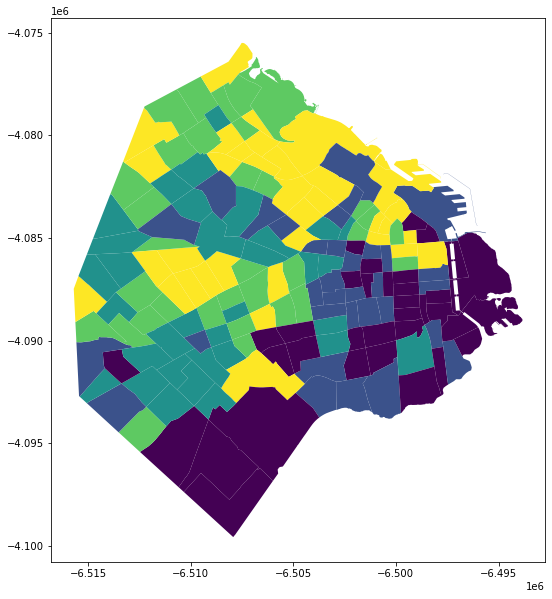

In [133]:
#censovotos['logRatio']= (censo.pp3/ censo.AREA)
censovotos.plot(column='pp3', scheme='', figsize=(10, 10))

<AxesSubplot:title={'center':'Porcentaje de votos del partido 3 por circuito electoral'}, xlabel='Longitud', ylabel='Latitud'>

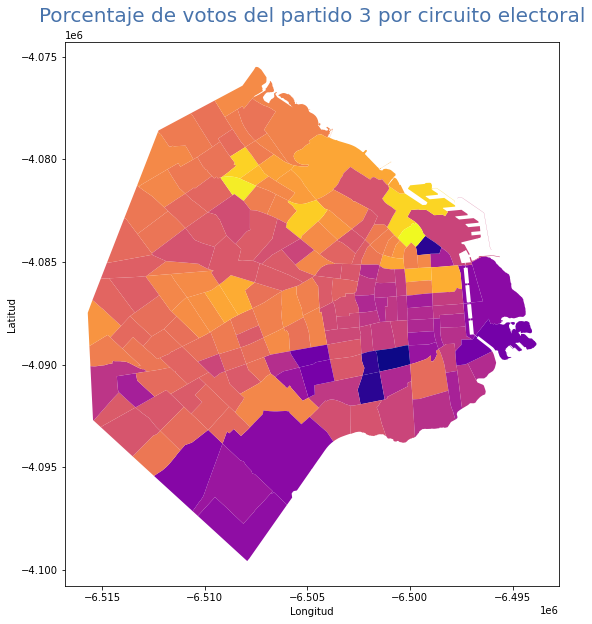

In [138]:
fig, ax = plt.subplots(figsize=(10, 10))
 
# Control del título y los ejes
ax.set_title('Porcentaje de votos del partido 3 por circuito electoral', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
 
# Mostrar el mapa finalizado
censovotos.plot(column='pp3', cmap='plasma', ax=ax, zorder=5)